## Non-negative Matrix Factorization (NMF)

* Dimension Reduction
* can tell us  interpretable parts unlike PCA
     * documents - combination of topics 
     * images - parts features 
     
sklearn NMF

* need to provide n_components

* feature values must be non-negative


Samples Can be reconstructed 

MF - Matrix Factorization 
Divide the matrix in 2 parts 
    

In [96]:


import pandas as pd
import numpy as np 



In [97]:
articles = pd.read_csv('../datasets/wikipedia/wikipedia-vectors.csv')
articles.drop("Unnamed: 0",axis=1, inplace = True)
titles = list(articles.columns)
print(titles)

['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie', 'Google Search', 'Tumblr', 'Hypertext Transfer Protocol', 'Social search', 'Firefox', 'LinkedIn', 'Global warming', 'Nationally Appropriate Mitigation Action', 'Nigel Lawson', 'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org', 'Greenhouse gas emissions by the United States', '2010 United Nations Climate Change Conference', '2007 United Nations Climate Change Conference', 'Angelina Jolie', 'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones', 'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning', 'Anne Hathaway', 'Jennifer Aniston', 'France national football team', 'Cristiano Ronaldo', 'Arsenal F.C.', 'Radamel Falcao', 'Zlatan Ibrahimović', 'Colombia national football team', '2014 FIFA World Cup qualification', 'Football', 'Neymar', 'Franck Ribéry', 'Tonsillitis', 'Hepatitis B', 'Doxycycline', 'Leukemia', 'Gout', 'Hepatitis C', 'Prednisone', 'Fever', 'Gabapentin', 'Lymphoma', 'Chad 

In [98]:
articles = articles.T
articles.shape


(60, 13125)

In [100]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
# print(nmf_features)
print(nmf_features.shape)

(60, 6)


This doesn't make sense at the moment but we will see later. 

Let's explore the NMF Features now 


In [86]:
titles

['HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search',
 'Tumblr',
 'Hypertext Transfer Protocol',
 'Social search',
 'Firefox',
 'LinkedIn',
 'Global warming',
 'Nationally Appropriate Mitigation Action',
 'Nigel Lawson',
 'Connie Hedegaard',
 'Climate change',
 'Kyoto Protocol',
 '350.org',
 'Greenhouse gas emissions by the United States',
 '2010 United Nations Climate Change Conference',
 '2007 United Nations Climate Change Conference',
 'Angelina Jolie',
 'Michael Fassbender',
 'Denzel Washington',
 'Catherine Zeta-Jones',
 'Jessica Biel',
 'Russell Crowe',
 'Mila Kunis',
 'Dakota Fanning',
 'Anne Hathaway',
 'Jennifer Aniston',
 'France national football team',
 'Cristiano Ronaldo',
 'Arsenal F.C.',
 'Radamel Falcao',
 'Zlatan Ibrahimović',
 'Colombia national football team',
 '2014 FIFA World Cup qualification',
 'Football',
 'Neymar',
 'Franck Ribéry',
 'Tonsillitis',
 'Hepatitis B',
 'Doxycycline',
 'Leukemia',
 'Gout',
 'Hepatitis C',
 'Predniso

In [87]:
len(titles)

60

In [101]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index = titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575693
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422367
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [102]:
df.loc['Kyoto Protocol']

0    0.000000
1    0.000000
2    0.483304
3    0.000000
4    0.000000
5    0.000000
Name: Kyoto Protocol, dtype: float64

NMF with documents will give us matrix which learns the topics of the document.  So let's see what topics we have for the Actors features

In [103]:
words = pd.read_csv('../datasets/wikipedia/wikipedia-vocabulary-utf8.txt', names=["words"])
words.head()


,words
0,aaron
1,abandon
2,abandoned
3,abandoning
4,abandonment


In [106]:


# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns = words)

print(components_df.head())
# Print the shape of the DataFrame
print(components_df.shape)



# Select row 3: component
component = components_df.iloc[3]
print(component.shape)

# Print result of nlargest
print(component.nlargest())

   (aaron,)  (abandon,)  (abandoned,)  (abandoning,)  (abandonment,)  \
0  0.011375    0.001210      0.000000       0.001739        0.000136   
1  0.000000    0.000010      0.005663       0.000000        0.000002   
2  0.000000    0.000008      0.000000       0.000000        0.004691   
3  0.004148    0.000000      0.003056       0.000000        0.000614   
4  0.000000    0.000568      0.004917       0.000000        0.000000   

   (abbas,)  (abbey,)  (abbreviated,)  (abbreviation,)    (abc,)   ...    \
0       0.0       0.0        0.002463     2.445818e-07  0.000834   ...     
1       0.0       0.0        0.000566     5.002537e-04  0.000000   ...     
2       0.0       0.0        0.000758     1.604206e-05  0.000000   ...     
3       0.0       0.0        0.002436     8.143510e-05  0.003985   ...     
4       0.0       0.0        0.000089     4.259276e-05  0.000000   ...     

   (zealand,)  (zenith,)  (zeppelin,)   (zero,)  (zeus,)  (zimbabwe,)  \
0    0.025780        0.0     0.008324

In [107]:
# Select row 3: component
component = components_df.iloc[5]
print(component.shape)

# Print result of nlargest
print(component.nlargest())

(13125,)
(search,)      0.430267
(web,)         0.391251
(google,)      0.386795
(users,)       0.282694
(internet,)    0.255455
Name: 5, dtype: float64


## What is going on here?

In [57]:
components_df.head()

,"(aaron,)","(abandon,)","(abandoned,)","(abandoning,)","(abandonment,)","(abbas,)","(abbey,)","(abbreviated,)","(abbreviation,)","(abc,)",...,"(zealand,)","(zenith,)","(zeppelin,)","(zero,)","(zeus,)","(zimbabwe,)","(zinc,)","(zone,)","(zones,)","(zoo,)"
0,0.011376,0.001210,0.000000,0.001739,0.000136,0.0,0.0,0.002463,2.446731e-07,0.000834,...,0.025781,0.0,0.008324,0.000000,0.0,0.0,0.0,0.000000,0.000424,0.0
1,0.000000,0.000010,0.005663,0.000000,0.000002,0.0,0.0,0.000566,5.002185e-04,0.000000,...,0.008106,0.0,0.000000,0.001710,0.0,0.0,0.0,0.002813,0.000297,0.0
2,0.000000,0.000008,0.000000,0.000000,0.004691,0.0,0.0,0.000758,1.604131e-05,0.000000,...,0.008730,0.0,0.000000,0.001317,0.0,0.0,0.0,0.000000,0.000143,0.0
3,0.004149,0.000000,0.003056,0.000000,0.000614,0.0,0.0,0.002436,8.144333e-05,0.003985,...,0.012595,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001742,0.006721,0.0
4,0.000000,0.000568,0.004917,0.000000,0.000000,0.0,0.0,0.000089,4.258975e-05,0.000000,...,0.001809,0.0,0.000000,0.000017,0.0,0.0,0.0,0.000192,0.001351,0.0


## NMF learns it's parts

Firstly, Let's explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


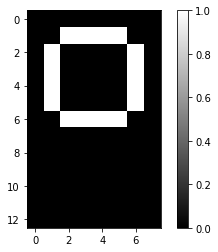

In [115]:
# Import pyplot
from matplotlib import pyplot as plt
%matplotlib inline

samples = pd.read_csv('../datasets/lcd-digits.csv')
# print(samples.head())
samples = samples.values

# Select the 0th row: digit
digit = samples[0]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:
lt.show()

After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

In [109]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

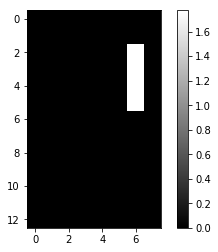

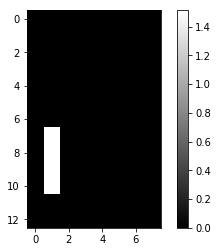

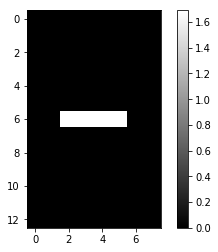

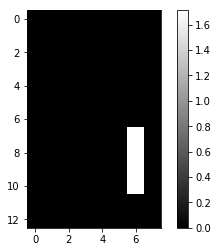

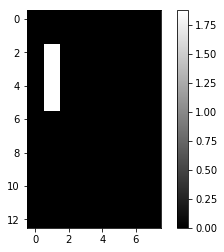

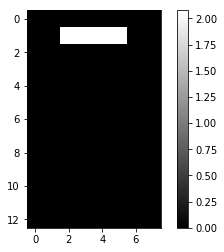

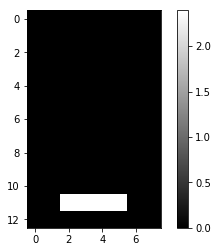

[ 0.56389272  0.          0.59151401  0.          0.53290007  0.48133215
  0.        ]


In [116]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. 


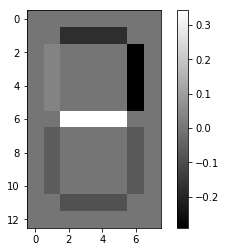

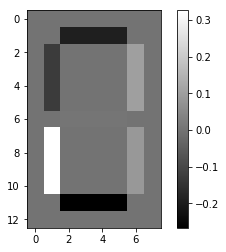

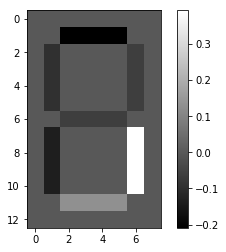

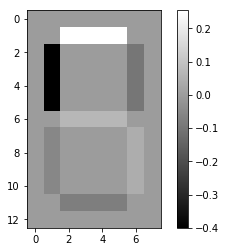

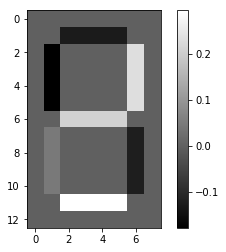

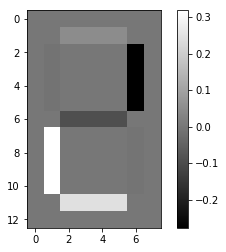

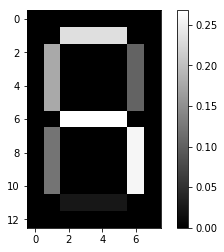

In [117]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

## Recommendation Using NMF

**Which articles are similar to 'Cristiano Ronaldo'?**

Use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo.

In [118]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


In [112]:
print(similarities.nsmallest())

HTTP 404          0.000724
Alexa Internet    0.000724
HTTP cookie       0.000724
Google Search     0.000724
Social search     0.000724
dtype: float64


In [113]:
titles

['HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search',
 'Tumblr',
 'Hypertext Transfer Protocol',
 'Social search',
 'Firefox',
 'LinkedIn',
 'Global warming',
 'Nationally Appropriate Mitigation Action',
 'Nigel Lawson',
 'Connie Hedegaard',
 'Climate change',
 'Kyoto Protocol',
 '350.org',
 'Greenhouse gas emissions by the United States',
 '2010 United Nations Climate Change Conference',
 '2007 United Nations Climate Change Conference',
 'Angelina Jolie',
 'Michael Fassbender',
 'Denzel Washington',
 'Catherine Zeta-Jones',
 'Jessica Biel',
 'Russell Crowe',
 'Mila Kunis',
 'Dakota Fanning',
 'Anne Hathaway',
 'Jennifer Aniston',
 'France national football team',
 'Cristiano Ronaldo',
 'Arsenal F.C.',
 'Radamel Falcao',
 'Zlatan Ibrahimović',
 'Colombia national football team',
 '2014 FIFA World Cup qualification',
 'Football',
 'Neymar',
 'Franck Ribéry',
 'Tonsillitis',
 'Hepatitis B',
 'Doxycycline',
 'Leukemia',
 'Gout',
 'Hepatitis C',
 'Predniso

In [114]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Fever']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Fever          1.000000
Gout           0.992556
Prednisone     0.989276
Doxycycline    0.988690
Tonsillitis    0.987951
dtype: float64


## Assignment

Create a music recommendation service using the artist data. 
The data can be found in References links

A smaller data is uploaded in the datasets folder. So first try on that. 


Steps to Complete it 

1. The data is not in the format we want (sparse and tidy), so first step is to convert to that. If you are unable to convert it then a ready format is already provided in the datasets folder. Use that. 

1. The data is not scaled. So first use a Scaler (Preferred in MaxabsScaler or Standard Scaler)

2. Then use the Normalization of data to unit norm. [Why is this important wand What is this](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization)?

3. Once you have the clean data then use NMF and do all the stuff. 


I love Simon and Garfunkel. What should I listen next? Email me. 



## References:

1. http://vazic.me/non-negative-matrix-factorization-nmf/  A tutorial for interpretation of NMF matrices

2. https://github.com/ADBI-Project/Project1/blob/master/user_artist_data_small.txt - User artist data full file 